#**Import Statements**(Saved the estimator file in gdrive to reload them quickly as the training with rfe took long time)

In [16]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import joblib
from google.colab import drive
from google.colab import drive
drive.mount('ndrive')
drive.mount('/content/gdrive')



Mounted at ndrive
Mounted at /content/gdrive


#**Upload Data**

In [8]:
#Reading data 
url="https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv "
df=pd.read_csv(url)
display(df)
print(df.isnull().sum(axis = 0))
for col in df.columns.values:
  print(str(df[col].dtypes))

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


DYRK1A_N                0
ITSN1_N                 0
BDNF_N                  0
NR1_N                   0
NR2A_N                  0
                     ... 
EGR1_N                180
H3MeK4_N              180
CaNA_N                  0
Genotype                0
Treatment_Behavior      0
Length: 79, dtype: int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object


#**Understanding the data**

In [9]:
#Analysing the data
print(pd.unique(df['Genotype']))
print(df['Genotype'].value_counts())
print(pd.unique(df['Treatment_Behavior']))
print(df['Treatment_Behavior'].value_counts())
A=np.array(df.isnull().sum(axis = 0))
columns = list(df)[:77]
print(A)
for i in range(77):
  if(A[i]>0):
    print(columns[i],"=",A[i])


['Control' 'Ts65Dn']
Control    435
Ts65Dn     327
Name: Genotype, dtype: int64
['Memantine_C/S' 'Memantine_S/C' 'Saline_C/S' 'Saline_S/C']
Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  15   0   0   0   4   0   0   0  15   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 180 195   0  60
   0 150 180 180   0   0   0]
ELK_N = 15
MEK_N = 4
Bcatenin_N = 15
BAD_N = 180
BCL2_N = 195
pCFOS_N = 60
H3AcK18_N = 150
EGR1_N = 180
H3MeK4_N = 180


#**Multivariate Feature Imputation**

In [10]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df[df.columns.values[:-2]])
df[df.columns.values[:-2]]=imp.transform(df[df.columns.values[:-2]]) #Multivariate feature imputation transform
display(df)
A=df.isnull().sum(axis = 0)
np.asarray(A)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

DYRK1A_N DYRK1A_N
DYRK1A_N ITSN1_N
DYRK1A_N BRAF_N
ITSN1_N DYRK1A_N
ITSN1_N ITSN1_N
BDNF_N BDNF_N
NR1_N NR1_N
NR2A_N NR2A_N
pAKT_N pAKT_N
pBRAF_N pBRAF_N
pCAMKII_N pCAMKII_N
pCREB_N pCREB_N
pELK_N pELK_N
pERK_N pERK_N
pJNK_N pJNK_N
PKCA_N PKCA_N
pMEK_N pMEK_N
pNR1_N pNR1_N
pNR2A_N pNR2A_N
pNR2B_N pNR2B_N
pPKCAB_N pPKCAB_N
pRSK_N pRSK_N
AKT_N AKT_N
BRAF_N DYRK1A_N
BRAF_N BRAF_N
CAMKII_N CAMKII_N
CREB_N CREB_N
ELK_N ELK_N
ERK_N ERK_N
GSK3B_N GSK3B_N
JNK_N JNK_N
MEK_N MEK_N
TRKA_N TRKA_N
RSK_N RSK_N
APP_N APP_N
Bcatenin_N Bcatenin_N
SOD1_N SOD1_N
MTOR_N MTOR_N
P38_N P38_N
pMTOR_N pMTOR_N
DSCR1_N DSCR1_N
AMPKA_N AMPKA_N
NR2B_N NR2B_N
pNUMB_N pNUMB_N
RAPTOR_N RAPTOR_N
TIAM1_N TIAM1_N
pP70S6_N pP70S6_N
NUMB_N NUMB_N
P70S6_N P70S6_N
pGSK3B_N pGSK3B_N
pPKCG_N pPKCG_N
CDK5_N CDK5_N
S6_N S6_N
ADARB1_N ADARB1_N
AcetylH3K9_N AcetylH3K9_N
RRP1_N RRP1_N
BAX_N BAX_N
ARC_N ARC_N
ARC_N pS6_N
ERBB4_N ERBB4_N
nNOS_N nNOS_N
Tau_N Tau_N
GFAP_N GFAP_N
GluR3_N GluR3_N
GluR4_N GluR4_N
IL1B_N IL1B_N
P3525_N P3

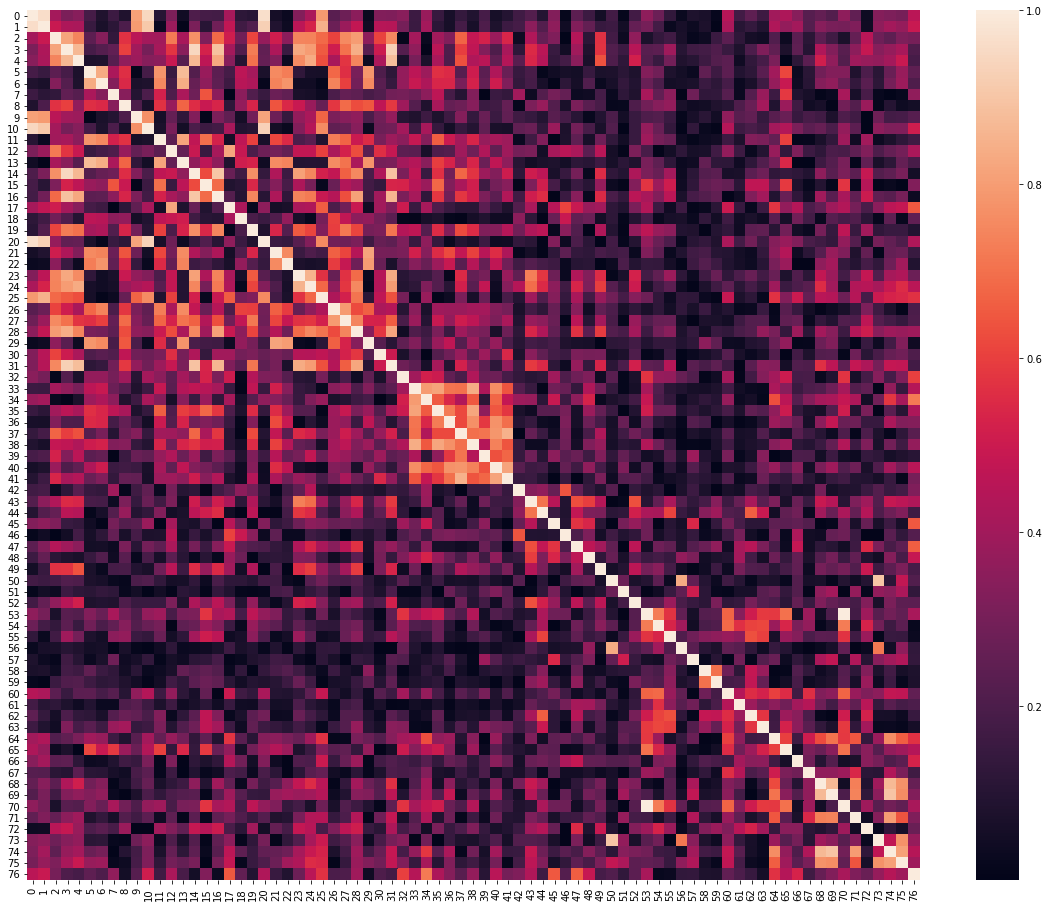

In [11]:
#Correlation calculation
columns = list(df)[:77]
corr=np.corrcoef(np.transpose(np.asarray(df[df.columns.values[:-2]])))
for i in range(77):
  for j  in range(77):
    if(corr[i][j]>0.95):
      print(columns[i],columns[j])
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(abs(corr))
plt.show()

#**Logistic Regression**

In [ ]:

encoder1 = OrdinalEncoder();y=encoder1.fit_transform(np.array(df[df.columns.values[-2]]).reshape(-1,1));y=y.flatten()
X=np.array(df[df.columns.values[:-2]]);

param_grid = [{'estimator__random_state':[0],'estimator__penalty':['elasticnet'],'estimator__solver':['saga'],'estimator__l1_ratio':[0.1, 0.3,0.5,0.7,0.9],'estimator__max_iter':[10000]}]
estimator = LogisticRegression()
selector = RFE(estimator, step=15)
clf_LR1 = GridSearchCV(selector, param_grid,scoring='f1', cv=5)
clf_LR1.fit(X, y)

print(clf_LR1.best_estimator_.estimator_)
print(clf_LR1.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_LR1.cv_results_)

#save your model or results
joblib.dump(clf_LR1, '/content/gdrive/My Drive/clf_LR1.pkl')

#load your model for further usage
#joblib.load("/content/gdrive/My Drive/clf_NN1.pkl")

LogisticRegression(l1_ratio=0.9, max_iter=10000, penalty='elasticnet',
                   random_state=0, solver='saga')
[4 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 2 1 1 3 3 3 1 3 1 3 1 1 1 4 1
 4 1 4 4 1 4 4 1 4 1 4 1 1 1 4 4 4 4 4 3 3 1 3 1 3 3 1 3 1 1 3 3 3 2 1 1 2
 3 4 2]


['/content/gdrive/My Drive/clf_LR1.pkl']

In [ ]:
encoder = OrdinalEncoder();y=encoder.fit_transform(np.array(df[df.columns.values[-1]]).reshape(-1,1));y=y.flatten()
X=np.array(df[df.columns.values[:-2]]);

param_grid = [{'estimator__random_state':[0],'estimator__penalty':['elasticnet'],'estimator__solver':['saga'],'estimator__l1_ratio':[0.1, 0.3,0.5,0.7,0.9],'estimator__max_iter':[10000]}]
estimator = LogisticRegression()
selector = RFE(estimator, step=15)
clf_LR2 = GridSearchCV(selector, param_grid,scoring='f1_micro', cv=5)
clf_LR2.fit(X, y)

print(clf_LR2.best_estimator_.estimator_)
print(clf_LR2.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_LR2.cv_results_)

#save your model or results
joblib.dump(clf_LR2, '/content/gdrive/My Drive/clf_LR2.pkl')

LogisticRegression(l1_ratio=0.9, max_iter=10000, penalty='elasticnet',
                   random_state=0, solver='saga')
[1 1 2 2 1 2 2 1 2 1 1 2 3 3 3 1 1 1 3 1 1 1 4 1 1 1 4 4 1 4 1 1 1 1 1 1 1
 4 1 1 3 2 1 3 1 3 1 3 1 1 1 4 4 4 4 4 4 4 4 4 1 1 1 1 3 1 1 3 3 3 3 3 2 2
 3 4 1]


['/content/gdrive/My Drive/clf_LR2.pkl']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Neural Networks

In [2]:
class manual_feature_importance_getter:

    def __init__ (self, estimator, transform_func=None, norm_order=1):
        self.estimator = estimator
        self.transform_func = transform_func
        self.norm_order = norm_order

    def __call__(self, estimator):

        # Get the base estimator from the regression chain
        #estimator = estimator.base_estimator

        # This is modified from the SKLearn > Feature Selection > _base.py file
        if hasattr(estimator, 'coef_'):
            #print('yay!')
            getter = attrgetter('coef_')
            importances = getter(estimator)

        elif hasattr(estimator, 'feature_importances_'):
            #print('yay!')
            getter = attrgetter('feature_importances_')
            importances = getter(estimator)
        
        else:
            #print('DOH!')
            importances = np.zeros(shape=(X.shape[1],1))
        

        if self.transform_func is None:
            return importances
        elif self.transform_func == "norm":
            if importances.ndim == 1:
                importances = np.abs(importances)
            else:
                importances = np.linalg.norm(importances, axis=0,
                                             ord=self.norm_order)
        elif self.transform_func == "square":
            if importances.ndim == 1:
                importances = safe_sqr(importances)
            else:
                importances = safe_sqr(importances).sum(axis=0)
        else:
            raise ValueError("Valid values for `self.transform_func` are " +
                             "None, 'norm' and 'square'. Those two " +
                             "transformation are only supported now")

        return importances

In [ ]:
y=encoder.fit_transform(np.array(df[df.columns.values[-2]]).reshape(-1,1));y=y.flatten()

param_grid = [{'estimator__solver':['lbfgs'], 'estimator__learning_rate_init':[0.01,0.1,0.7],
'estimator__hidden_layer_sizes':[2,10,100],'estimator__max_iter':[100000]}]
estimator = MLPClassifier()
selector = RFE(estimator, step=15,importance_getter=manual_feature_importance_getter(estimator,None,1))     #RFECV(estimator=RegressorChain(base_estimator=estimator, order=[0, 1, 3, 4, 2, 5]), importance_getter=manual_feature_importance_getter(RegressorChain(base_estimator=estimator, order=[0, 1, 3, 4, 2, 5]), None, 1))
clf_NN1 = GridSearchCV(selector, param_grid,scoring='f1', cv=5)
clf_NN1.fit(X, y)

print(clf_NN1.best_estimator_.estimator_)
#print(clf_NN1.best_estimator_.grid_scores_) 
print(clf_NN1.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_NN1.cv_results_)

#save your model or results
joblib.dump(clf_NN1, '/content/gdrive/My Drive/clf_NN1.pkl')

In [ ]:
encoder = OrdinalEncoder();y=encoder.fit_transform(np.array(df[df.columns.values[-1]]).reshape(-1,1));y=y.flatten()
X=np.array(df[df.columns.values[:-2]]);
param_grid = [{'estimator__solver':['lbfgs'], 'estimator__learning_rate_init':[0.01,0.1,0.7],
'estimator__hidden_layer_sizes':[2,10,100],'estimator__max_iter':[100000]}]
estimator = MLPClassifier()
selector = RFE(estimator, step=15,importance_getter=manual_feature_importance_getter(estimator,None,1))     
clf_NN2 = GridSearchCV(selector, param_grid,scoring='f1_micro', cv=5)
clf_NN2.fit(X, y)

print(clf_NN2.best_estimator_.estimator_) 
print(clf_NN2.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_NN2.cv_results_)

#save your model or results
joblib.dump(clf_NN2, '/content/gdrive/My Drive/clf_NN2.pkl')

#SVM

In [ ]:
encoder = OrdinalEncoder();
X=np.array(df[df.columns.values[:-2]]);
y=encoder.fit_transform(np.array(df[df.columns.values[-2]]).reshape(-1,1));y=y.flatten()

param_grid=[{'estimator__kernel':["linear","poly","rbf"],'estimator__gamma':[0.001,0.01],'estimator__C': [ 0.1, 1.0, 10.0, 100.0]}]
estimator = svm.SVC()
selector = RFE(estimator, step=15)
clf_SVM1 = GridSearchCV(selector, param_grid,scoring='f1', cv=5)
clf_SVM1.fit(X, y)

print(clf_SVM1.best_estimator_.estimator_)
print(clf_SVM1.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_SVM1.cv_results_)

#save your model or results
joblib.dump(clf_SVM1, '/content/gdrive/My Drive/clf_SVM1.pkl')

In [ ]:

y=encoder.fit_transform(np.array(df[df.columns.values[-1]]).reshape(-1,1));y=y.flatten()

param_grid=[{'estimator__kernel':["linear","poly","rbf"],'estimator__gamma':[0.001,0.005,0.01],'estimator__C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}]
estimator = svm.SVC()
selector = RFE(estimator, step=15)
clf_SVM2 = GridSearchCV(selector, param_grid,scoring='f1_micro', cv=5)
clf_SVM2.fit(X, y)

print(clf_SVM2.best_estimator_.estimator_)
print(clf_SVM2.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_SVM2.cv_results_)

#save your model or results
joblib.dump(clf_SVM2, '/content/gdrive/My Drive/clf_SVM2.pkl')

#Random Forest Classifier

In [ ]:

y=encoder.fit_transform(np.array(df[df.columns.values[-2]]).reshape(-1,1));y=y.flatten()
param_grid=[{'estimator__n_estimators':[100,300,500],'estimator__max_depth': [2,3],'estimator__max_features':["auto", "sqrt", "log2"]}]
estimator = RandomForestClassifier()
selector = RFE(estimator, step=15)
clf_RF1 = GridSearchCV(selector, param_grid,scoring='f1', cv=5)
clf_RF1.fit(X, y)

print(clf_RF1.best_estimator_.estimator_) 
print(clf_RF1.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_RF1.cv_results_)

#save your model or results
joblib.dump(clf_RF1, '/content/gdrive/My Drive/clf_RF1.pkl')

In [ ]:
joblib.dump(clf_RF1, '/content/gdrive/My Drive/clf_RF1.pkl')

In [ ]:

y=encoder.fit_transform(np.array(df[df.columns.values[-1]]).reshape(-1,1));y=y.flatten()
param_grid=[{'estimator__n_estimators':[100,500],'estimator__max_depth': [3,10,50],'estimator__max_features':["auto", "sqrt", "log2"]}]
estimator = RandomForestClassifier()
selector = RFE(estimator, step=15)
clf_RF2 = GridSearchCV(selector, param_grid,scoring='f1_micro', cv=5)
clf_RF2.fit(X, y)

print(clf_RF2.best_estimator_.estimator_)
print(clf_RF2.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_RF2.cv_results_)

#save your model or results
joblib.dump(clf_RF2, '/content/gdrive/My Drive/clf_RF2.pkl')

#**Feature Importance** 

In [5]:
clf_LR1=joblib.load("/content/gdrive/MyDrive/clf_LR1.pkl")
clf_LR2=joblib.load("/content/gdrive/MyDrive/clf_LR2.pkl")
clf_SVM1=joblib.load("/content/gdrive/MyDrive/clf_SVM1.pkl")
clf_SVM2=joblib.load("/content/gdrive/MyDrive/clf_SVM2.pkl")
clf_RF1=joblib.load("/content/gdrive/MyDrive/clf_RF1.pkl")
clf_RF2=joblib.load("/content/gdrive/MyDrive/clf_RF2.pkl")
clf_NN1=joblib.load("/content/gdrive/MyDrive/clf_NN1.pkl")
clf_NN2=joblib.load("/content/gdrive/MyDrive/clf_NN2.pkl")

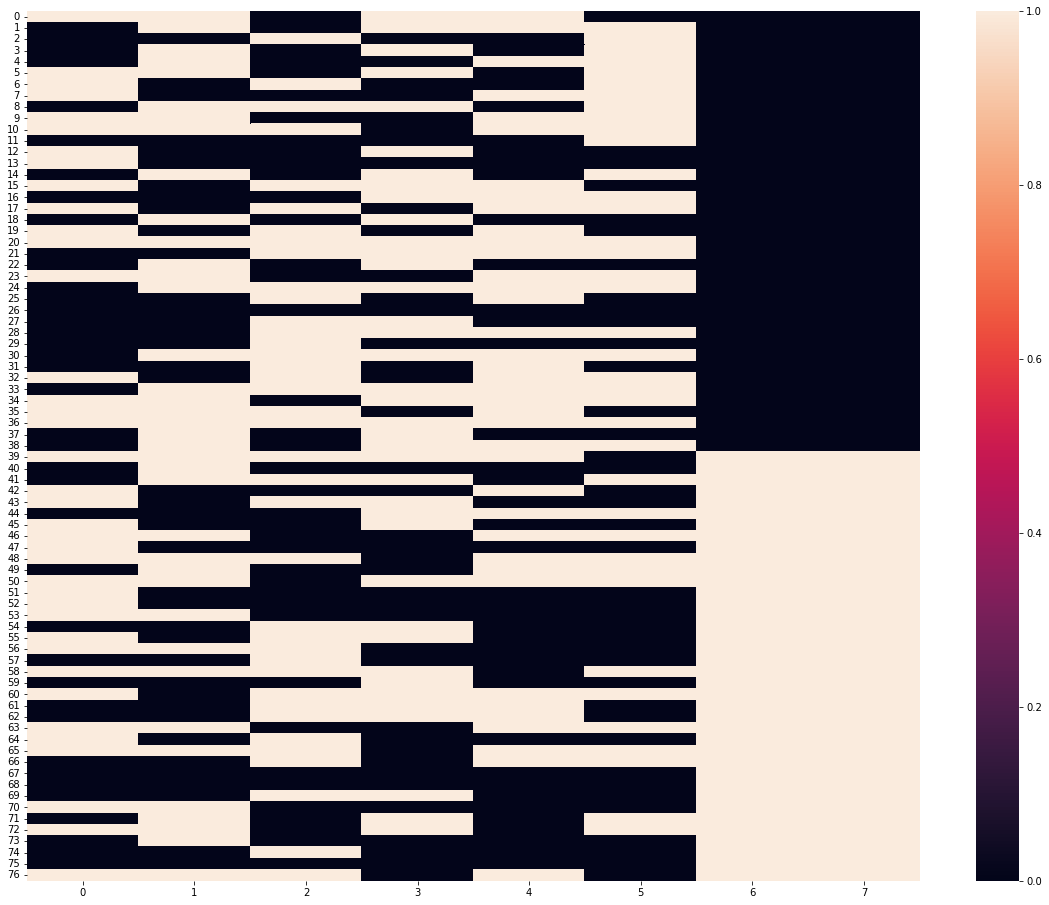

[['pERK_N']
 ['BRAF_N']
 ['ERK_N']
 ['APP_N']
 ['MTOR_N']
 ['P38_N']
 ['DSCR1_N']
 ['pNUMB_N']
 ['TIAM1_N']
 ['NUMB_N']
 ['P70S6_N']
 ['pPKCG_N']
 ['S6_N']
 ['ADARB1_N']
 ['AcetylH3K9_N']
 ['nNOS_N']
 ['Tau_N']
 ['GluR3_N']
 ['IL1B_N']
 ['P3525_N']
 ['pCASP9_N']
 ['PSD95_N']
 ['Ubiquitin_N']
 ['pGSK3B_Tyr216_N']
 ['pCFOS_N']
 ['SYP_N']
 ['CaNA_N']] [[10]
 [20]
 [24]
 [30]
 [33]
 [34]
 [36]
 [39]
 [41]
 [43]
 [44]
 [46]
 [48]
 [49]
 [50]
 [55]
 [56]
 [58]
 [60]
 [61]
 [62]
 [63]
 [65]
 [66]
 [71]
 [72]
 [76]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [12]:
A=np.reshape(clf_RF2.best_estimator_.support_,(1,-1));
B=np.reshape(clf_RF1.best_estimator_.support_,(1,-1));

C=np.reshape(clf_SVM2.best_estimator_.support_,(1,-1));
D=np.reshape(clf_SVM1.best_estimator_.support_,(1,-1));

E=np.reshape(clf_LR2.best_estimator_.support_,(1,-1));
F=np.reshape(clf_LR1.best_estimator_.support_,(1,-1));

G=np.reshape(clf_NN2.best_estimator_.support_,(1,-1));
H=np.reshape(clf_NN1.best_estimator_.support_,(1,-1));

S=np.transpose(np.concatenate((A,B,C,D,E,F,G,H)))
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(S)
plt.show()


A1=np.array(clf_RF1.best_estimator_.support_)
A2=np.array(clf_RF2.best_estimator_.support_)

B1=np.array(clf_SVM1.best_estimator_.support_)
B2=np.array(clf_SVM2.best_estimator_.support_)

C1=np.array(clf_LR1.best_estimator_.support_)
C2=np.array(clf_LR2.best_estimator_.support_)

D1=np.array(clf_NN1.best_estimator_.support_)
D2=np.array(clf_NN2.best_estimator_.support_)

z=np.zeros(np.shape(A1))
print(df.columns[np.argwhere((z+A1+A2+B1+B2+C1+C2+D1+D2)>=5)],np.argwhere((z+A1+A2+B1+B2+C1+C2+D1+D2)>=5))

#Result Comparison

In [14]:
print(clf_LR1.best_score_)
print(clf_LR2.best_score_)
print(clf_RF1.best_score_)
print(clf_RF2.best_score_)
print(clf_SVM1.best_score_)
print(clf_SVM2.best_score_)
print(clf_NN1.best_score_)
print(clf_NN2.best_score_)

print(clf_LR1.best_estimator_)
print(clf_LR2.best_estimator_)
print(clf_RF1.best_estimator_)
print(clf_RF2.best_estimator_)
print(clf_SVM1.best_estimator_)
print(clf_SVM2.best_estimator_)
print(clf_NN1.best_estimator_)
print(clf_NN2.best_estimator_)
display(pd.DataFrame.from_dict(clf_SVM2.cv_results_))

0.649539773779477
0.6849071207430342
0.581405878251263
0.6640006879944961
0.741100120416972
0.7559769521843825
0.6126536628940383
0.6574733402132782
RFE(estimator=LogisticRegression(l1_ratio=0.9, max_iter=10000,
                                 penalty='elasticnet', random_state=0,
                                 solver='saga'),
    step=15)
RFE(estimator=LogisticRegression(l1_ratio=0.9, max_iter=10000,
                                 penalty='elasticnet', random_state=0,
                                 solver='saga'),
    step=15)
RFE(estimator=RandomForestClassifier(max_depth=3, max_features='sqrt',
                                     n_estimators=300))
RFE(estimator=RandomForestClassifier(max_depth=10, max_features='log2'),
    step=15)
RFE(estimator=SVC(C=10.0, gamma=0.001, kernel='linear'), step=15)
RFE(estimator=SVC(C=100.0, gamma=0.001, kernel='linear'), step=15)
RFE(estimator=MLPClassifier(hidden_layer_sizes=100, learning_rate_init=0.1,
                            max_iter=

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__gamma,param_estimator__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.179267,0.028167,0.009163,0.002252,0.01,0.001,linear,"{'estimator__C': 0.01, 'estimator__gamma': 0.0...",0.568627,0.633987,0.513158,0.532895,0.427632,0.535260,0.067732,16
1,0.058143,0.008951,0.000000,0.000000,0.01,0.001,poly,"{'estimator__C': 0.01, 'estimator__gamma': 0.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
2,0.082205,0.009261,0.000000,0.000000,0.01,0.001,rbf,"{'estimator__C': 0.01, 'estimator__gamma': 0.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
3,0.192286,0.023338,0.011060,0.004263,0.01,0.005,linear,"{'estimator__C': 0.01, 'estimator__gamma': 0.0...",0.568627,0.633987,0.513158,0.532895,0.427632,0.535260,0.067732,16
4,0.054308,0.004415,0.000000,0.000000,0.01,0.005,poly,"{'estimator__C': 0.01, 'estimator__gamma': 0.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
5,0.073157,0.002005,0.000000,0.000000,0.01,0.005,rbf,"{'estimator__C': 0.01, 'estimator__gamma': 0.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
6,0.146993,0.035395,0.007589,0.000450,0.01,0.01,linear,"{'estimator__C': 0.01, 'estimator__gamma': 0.0...",0.568627,0.633987,0.513158,0.532895,0.427632,0.535260,0.067732,16
7,0.037652,0.008201,0.000000,0.000000,0.01,0.01,poly,"{'estimator__C': 0.01, 'estimator__gamma': 0.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
8,0.050651,0.003322,0.000000,0.000000,0.01,0.01,rbf,"{'estimator__C': 0.01, 'estimator__gamma': 0.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
9,0.085437,0.006418,0.008085,0.002725,0.1,0.001,linear,"{'estimator__C': 0.1, 'estimator__gamma': 0.00...",0.718954,0.738562,0.605263,0.565789,0.598684,0.645451,0.069600,13


#**Testing the best classifier- SVM**

In [36]:

url="https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv "
df_test=pd.read_csv(url)

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_test[df_test.columns.values[:-2]])
df_test[df_test.columns.values[:-2]]=imp.transform(df_test[df_test.columns.values[:-2]])
display(df_test)
X_test=np.array(df_test[df_test.columns.values[:-2]]);

print((clf_LR1.best_estimator_.predict(X_test)))
print(clf_LR2.best_estimator_.predict(X_test))

encoder1 = OrdinalEncoder();y=encoder1.fit_transform(np.array(df_test[df_test.columns.values[-2]]).reshape(-1,1));y1=y.flatten();
print(f1_score(y1,clf_SVM1.best_estimator_.predict(X_test)))
encoder = OrdinalEncoder();y=encoder.fit_transform(np.array(df_test[df_test.columns.values[-1]]).reshape(-1,1));y2=y.flatten()
print(f1_score(y2,clf_SVM2.best_estimator_.predict(X_test),average='micro'))


print(encoder1.inverse_transform(clf_SVM1.best_estimator_.predict(X_test).reshape(-1,1)))
print(encoder.inverse_transform(clf_SVM2.best_estimator_.predict(X_test).reshape(-1,1)))

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.121739,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.116850,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.108506,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.144687,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.140219,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 3.
 3. 1. 3. 2. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 2. 

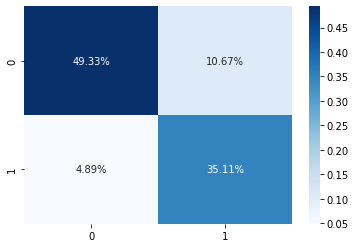

In [41]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y1,clf_SVM1.best_estimator_.predict(X_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


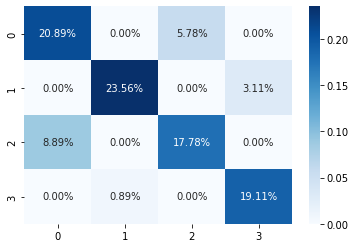

In [40]:
cf_matrix = confusion_matrix(y2,clf_SVM2.best_estimator_.predict(X_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#**Observations**
##1. Read the data and performed exploratory analysis. 
##2.
a. Which variables are usable, and which are not?

    ELK_N = 15
    MEK_N = 4
    Bcatenin_N = 15
    BAD_N = 180
    BCL2_N = 195
    pCFOS_N = 60
    H3AcK18_N = 150
    EGR1_N = 180
    H3MeK4_N = 180

b. Are there significant correlations among variables?
    
    Variables are not correlated except some like (above 0.95 correlation)-
    DYRK1A_N DYRK1A_N
    DYRK1A_N ITSN1_N
    DYRK1A_N BRAF_N
    ITSN1_N DYRK1A_N
    ITSN1_N ITSN1_N
    BDNF_N BDNF_N
    NR1_N NR1_N

c. Are the classes balanced?

    Yes the classes are fairly balanced,
    Memantine_C/S    225
    Memantine_S/C    225
    Saline_C/S       180
    Saline_S/C       132

    Control    435
    Ts65Dn     327

##3.
Used Multivariate Feature Imputation-It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion.

##4.
f1 score-The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is

    F1 = 2 * (precision * recall) / (precision + recall)

f1-micro:
Calculate metrics globally by counting the total true positives, false negatives and false positives.

##5.
Since RFECV was taking huge amount of time to execute used RFE with n_features/2 as the default parameter.
We can see that the features are not uniformly important for different classifiers. Proteins like ['pERK_N']
 ['BRAF_N']
 ['ERK_N']
 ['APP_N']
 ['MTOR_N']
 ['P38_N']
 ['DSCR1_N']
 ['pNUMB_N']
 ['TIAM1_N']
 ['NUMB_N']
 ['P70S6_N']
 ['pPKCG_N']
 ['S6_N']
 ['ADARB1_N']
 ['AcetylH3K9_N']
 ['nNOS_N']
 ['Tau_N']
 ['GluR3_N']
 ['IL1B_N']
 ['P3525_N']
 ['pCASP9_N']
 ['PSD95_N']
 ['Ubiquitin_N']
 ['pGSK3B_Tyr216_N']
 ['pCFOS_N']
 ['SYP_N']
 ['CaNA_N']] are very important for all the classes and are present in more than 5 classifiers.

**Amongst**  all the classifiers
 SVM performed the best with f1 score of 0.7 for both the classification.

 **Parameters**-
RFE(estimator=LogisticRegression(l1_ratio=0.9, max_iter=10000,
                                 penalty='elasticnet', random_state=0,
                                 solver='saga')
   

RFE(estimator=LogisticRegression(l1_ratio=0.9, max_iter=10000,
                                 penalty='elasticnet', random_state=0,
                                 solver='saga')
    

RFE(estimator=RandomForestClassifier(max_depth=3, max_features='sqrt',
                                     n_estimators=300))
RFE(estimator=RandomForestClassifier(max_depth=10, max_features='log2')
    
RFE(estimator=SVC(C=10.0,  kernel='linear')

RFE(estimator=SVC(C=100.0, kernel='linear')

RFE(estimator=MLPClassifier(hidden_layer_sizes=100, learning_rate_init=0.1,
                            max_iter=100000, solver='lbfgs')


RFE(estimator=MLPClassifier(hidden_layer_sizes=100, learning_rate_init=0.01,
                            max_iter=100000, solver='lbfgs'),

**Thoughts**

In the SVM the L1_ratio dominates ie some of the features have 0 weights ie not important and that is the case.
For random forest the multiclass classification required more number of nodes/max_depth.
For SVC linear kernels proved better than polynomial and rbf.
For Neural network bigger hidden layer sizes gave better performance.

**Test Results-**

Binary=0.8186528497409326

4 class=0.8133333333333334

The Test score is better than traing-validation score which tells us that model is not overfitted.

From the confusion matrix its clear that false negatives/positives are very less in percentage hence model is a decent classifier.

##References
1)https://stackoverflow.com/questions/51424312/how-to-save-gridsearchcv-object

2)https://stackoverflow.com/questions/69428789/get-feature-importances-using-sklearn-rfecv-with-multi-output-regression-chain

3)https://stackoverflow.com/questions/40905389/in-python-how-do-we-find-the-correlation-coefficient-between-two-matrices

4)https://stackoverflow.com/questions/45330240/scikit-learn-selectfrommodel-actually-obtain-the-feature-importance-scores-of

5)https://stackoverflow.com/questions/23815938/recursive-feature-elimination-and-grid-search-using-scikit-learn

6)https://stackoverflow.com/questions/40057049/using-confusion-matrix-as-scoring-metric-in-cross-validation-in-scikit-learn